<a href="https://colab.research.google.com/github/dushanir/Assignment1/blob/main/Assignment_Visualizing_Data_using_SOMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import pandas as pd

In [4]:
colnames=['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm',	'Species'] 
df = pd.read_csv('./iris.csv', names=colnames, header=None)

In [6]:
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,4.6,3.4,1.4,0.3,1


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [6]:
labels = df['Species'] 
c = labels.astype('category')
labels = c.cat.codes
class_names = c.cat.categories
labels.head(5)
df = df.drop(columns=['Species'], axis=1)

In [9]:
class_names

Int64Index([1, 2, 3], dtype='int64')

In [7]:
som_width = 20
som_length = 20
epochs = 50000
initial_learning_rate=0.01

In [8]:
from sklearn.preprocessing import MinMaxScaler
df= pd.DataFrame(MinMaxScaler(feature_range=(0, 1)).fit_transform(df.values))
df.head()

,0,1,2,3
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.083333,0.458333,0.084746,0.041667
3,0.194444,0.666667,0.067797,0.041667
4,0.083333,0.583333,0.067797,0.083333


In [9]:
!pip install minisom
from minisom import MiniSom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9018 sha256=f3e7fc6776e25c2a2db548d422bc079df65d80da4e0de57433b993feec741204
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [10]:
mini_som_net = MiniSom(som_length, som_width, 4, sigma=3, learning_rate =0.05, neighborhood_function='gaussian') 
mini_som_net.train_random(df.to_numpy(), 100000)

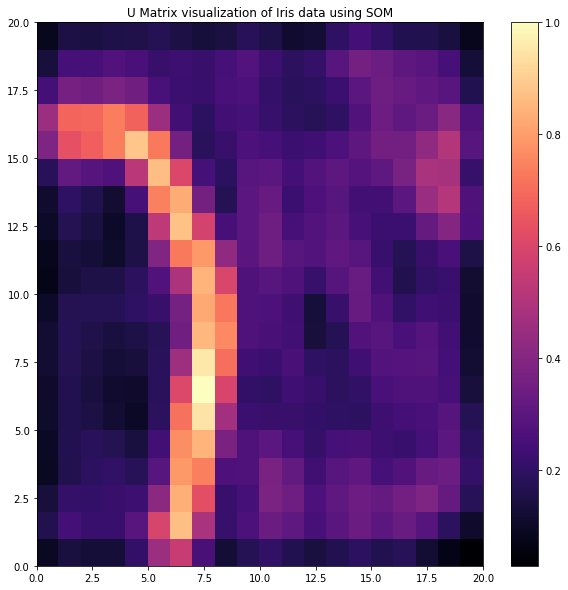

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,10))
plt.title("U Matrix visualization of Iris data using SOM")
plt.pcolor(mini_som_net.distance_map().T, cmap= 'magma' )
plt.colorbar()

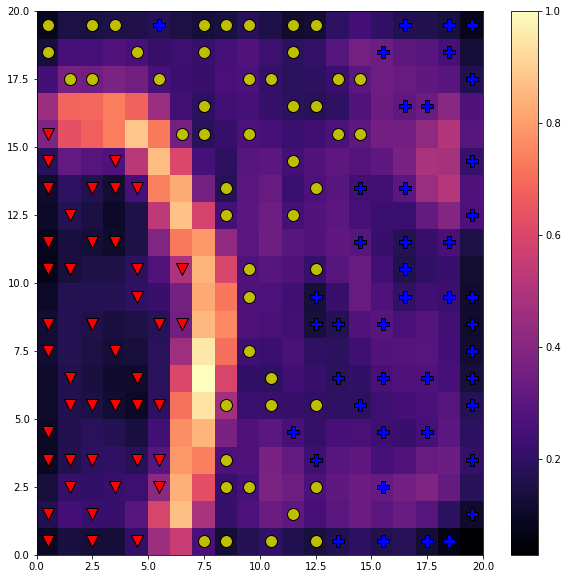

In [23]:
markers = ['v','o','P']
colors = ['r','y','b']
plt.figure(figsize=(10,10))
plt.pcolor(mini_som_net.distance_map().T, cmap= 'magma' )
plt.colorbar()

for cnt,xx in enumerate(df.to_numpy()):
    w = mini_som_net.winner(xx)
    plt.plot(w[0]+.5,w[1]+.5,markers[labels[cnt]],markersize=12, markerfacecolor=colors[labels[cnt]], markeredgecolor='k')